<a href="https://colab.research.google.com/github/mlcafe/Pengenalan-ML/blob/master/3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
from sklearn import metrics

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
import pandas as pd
import seaborn as sns



**LOAD DATA**

Binary classification of Iris

In [ ]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
#print(len(iris["data"]))
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

X_train = X[:80]
y_train = y[:80]
X_test = X[80:100]
y_test = y[80:100]

In [ ]:
X_test

array([[3.8, 1.1],
       [3.7, 1. ],
       [3.9, 1.2],
       [5.1, 1.6],
       [4.5, 1.5],
       [4.5, 1.6],
       [4.7, 1.5],
       [4.4, 1.3],
       [4.1, 1.3],
       [4. , 1.3],
       [4.4, 1.2],
       [4.6, 1.4],
       [4. , 1.2],
       [3.3, 1. ],
       [4.2, 1.3],
       [4.2, 1.2],
       [4.2, 1.3],
       [4.3, 1.3],
       [3. , 1.1],
       [4.1, 1.3]])

In [ ]:
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_train, y_train)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Plot Boundary

In [ ]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

**Decision Boundary**

Linear SVM of binary classification

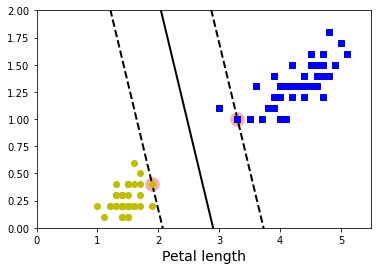

In [ ]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

Classification accuracy of linear SVM

In [ ]:
# SVC with linear kernel
# for SVC, may be impractical beyond tens of thousands of samples
prediction=svm_clf.predict(X_test)
print('The accuracy of the linear SVC is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))


The accuracy of the linear SVC is 1.000


Classification accuracy of non-linear SVM

In [ ]:
# SVC with polynomial kernel
poly_svc = SVC(kernel='rbf', degree = 4).fit(X_train, y_train)
prediction=poly_svc.predict(X_test)
print('The accuracy of the Poly SVC is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Poly SVC is 1.000


**Non-linear SVM for 3 classes**

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


Fit the data with different SVM classifiers

In [ ]:
h = .02  # step size in the mesh

C = 100  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)

Accuracy of different SVM classifiers on the data




In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

y_pred_svc = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svc)
accuracies = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 10)
print(cm)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]
Accuracy: 93.71 %


In [ ]:
y_pred_rbf = rbf_svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rbf)
accuracies = cross_val_score(estimator = rbf_svc, X = X_train, y = y_train, cv = 10)
print(cm)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 95.53 %


In [ ]:
y_pred_poly = poly_svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred_poly)
accuracies = cross_val_score(estimator = poly_svc, X = X_train, y = y_train, cv = 10)
print(cm)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 94.62 %
